<a href="https://colab.research.google.com/github/LucWeb80/projetoadacrudsantandercoders/blob/main/Covid2019_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análises Exploratórias e Estatísticas: "caso_full"  registros diários da pandemia da COVID-19

Grupo6: Natalia Camargo, Luciano, Priscila Castro, Raphael Pacheco, Thays Telles e Victor Castro.

## Informações Dataset

### Contextualização

Este notebook utiliza o dataset "caso_full", com dados diários da pandemia de COVID-19 no Brasil, organizados por município. A coleta e o tratamento dos dados foram feitos manualmente por Álvaro Justen e voluntários do projeto Brasil.IO, devido à falta de dados oficiais estruturados e acessíveis durante a crise. Informações sobre casos e mortes, frequentemente incompletas e demoradas, foram extraídas diretamente dos boletins epidemiológicos das Secretarias Estaduais de Saúde. Esse esforço colaborativo envolveu 35 voluntários e resultou em um dataset acessível via API e arquivos CSV, oferecendo uma base sólida para análises.

### Estrutura

| Coluna                                   | Descrição                                                                                                                                                          |
|------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **city**                                 | Nome do município. Pode estar em branco se o registro se refere ao estado ou se for categorizado como "Importados/Indefinidos".                                      |
| **city_ibge_code**                       | Código IBGE do município ou estado correspondente.                                                                                                                 |
| **date**                                 | Data de coleta dos dados no formato YYYY-MM-DD.                                                                                                                    |
| **epidemiological_week**                 | Número da semana epidemiológica, no formato YYYYWW.                                                                                                                |
| **estimated_population**                 | População estimada para o município/estado em 2020, segundo o IBGE.                                                                                                |
| **estimated_population_2019**            | População estimada para o município/estado em 2019, segundo o IBGE. ATENÇÃO: esta coluna é desatualizada. Prefira usar a coluna `estimated_population`.             |
| **is_last**                              | Indica se o registro é o mais recente para aquele local (`True` ou `False`).                                                                                       |
| **is_repeated**                          | Indica se os dados daquele dia foram publicados ou se são repetidos de um boletim anterior.                                                                         |
| **last_available_confirmed**             | Número de casos confirmados até a data especificada.                                                                                                               |
| **last_available_confirmed_per_100k_inhabitants** | Número de casos confirmados por 100.000 habitantes (com base na população estimada).                                                                                |
| **last_available_date**                  | Última data para a qual há dados disponíveis.                                                                                                                      |
| **last_available_death_rate**            | Taxa de mortalidade (número de mortes dividido pelo número de casos confirmados).                                                                                   |
| **last_available_deaths**                | Número total de mortes até a data especificada.                                                                                                                    |
| **order_for_place**                      | Ordem do registro para um local específico, começando em 1 para o primeiro boletim.                                                                                 |
| **place_type**                           | Tipo de local (municipal ou estadual), com valores "city" (município) ou "state" (estado).                                                                          |
| **state**                                | Sigla do estado (exemplo: SP para São Paulo).                                                                                                                      |
| **new_confirmed**                        | Número de novos casos confirmados desde o último dia registrado.                                                                                                   |
| **new_deaths**                           | Número de novos óbitos desde o último dia registrado.                                                                                                              |


### Metodologia de Coleta

Os dados foram coletados manualmente a partir dos boletins epidemiológicos das Secretarias Estaduais de Saúde. Quando um boletim não era divulgado, o dado anterior era replicado, sendo indicado pela coluna `is_repeated`. Esse processo contínuo foi conduzido por voluntários, monitorando casos, mortes, população e outras métricas.

### Diferenças entre Contagens Estaduais e Municipais

As divergências surgem por dois fatores:  
- **Divulgação centralizada por estado**: Algumas Secretarias, como a de São Paulo, pararam de publicar dados por município.  
- **Erros de divulgação**: Informações incorretas pelas Secretarias podem causar discrepâncias.  

### Comparação com Dados do Ministério da Saúde

Os dados do Brasil.IO podem ser mais recentes, pois a coleta é feita logo após a publicação dos boletins estaduais, enquanto o Ministério da Saúde pode receber informações antes de torná-las públicas.

### Limitações na Cobertura de Municípios

Os registros municipais podem não estar completos para todas as datas, iniciando apenas a partir do primeiro caso confirmado.

### Possíveis Análises

- Evolução temporal da COVID-19 por município  
- Taxa de mortalidade  
- Distribuição espacial dos casos  
- Casos por 100 mil habitantes  
- Comparação entre estados  
- Tendências de novos casos e mortes  
- Impacto populacional  

### Observação Final

As análises serão conduzidas conforme os objetivos e orientações de estudo da disciplina


## Análises Descritivas

In [ ]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from tabulate import tabulate

In [ ]:
# Importando Dataset

bd = pd.read_csv('content/caso_full.csv')

In [ ]:
# Definição do formato dos números
pd.set_option('display.float_format', lambda x: '{:,.0f}'.format(x).replace(',', '.'))

In [ ]:
# Primeiros 10 lançamentos
bd.head(10)

,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
0,Rio Branco,1.200.401,2020-03-17,202012,413.418,407.319,False,False,3,1,2020-03-17,0,0,1,city,AC,3,0
1,NaN,12,2020-03-17,202012,894.470,881.935,False,False,3,0,2020-03-17,0,0,1,state,AC,3,0
2,Rio Branco,1.200.401,2020-03-18,202012,413.418,407.319,False,False,3,1,2020-03-18,0,0,2,city,AC,0,0
3,NaN,12,2020-03-18,202012,894.470,881.935,False,False,3,0,2020-03-18,0,0,2,state,AC,0,0
4,Rio Branco,1.200.401,2020-03-19,202012,413.418,407.319,False,False,4,1,2020-03-19,0,0,3,city,AC,1,0
5,NaN,12,2020-03-19,202012,894.470,881.935,False,False,4,0,2020-03-19,0,0,3,state,AC,1,0
6,Rio Branco,1.200.401,2020-03-20,202012,413.418,407.319,False,False,7,2,2020-03-20,0,0,4,city,AC,3,0
7,NaN,12,2020-03-20,202012,894.470,881.935,False,False,7,1,2020-03-20,0,0,4,state,AC,3,0
8,Rio Branco,1.200.401,2020-03-21,202012,413.418,407.319,False,False,11,3,2020-03-21,0,0,5,city,AC,4,0
9,NaN,12,2020-03-21,202012,894.470,881.935,False,False,11,1,2020-03-21,0,0,5,state,AC,4,0


In [ ]:
# últimos 10 lançamentos
bd.tail(10)

,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
3853638,Taguatinga,1.720.903,2022-03-27,202213,16.825,16.683,False,True,1557,9.254,2021-12-08,0,31,674,city,TO,0,0
3853639,Taipas do Tocantins,1.720.937,2022-03-27,202213,2.166,2.148,False,True,205,9.464,2021-12-08,0,0,674,city,TO,0,0
3853640,Talismã,1.720.978,2022-03-27,202213,2.812,2.793,False,True,372,13.229,2021-12-08,0,2,674,city,TO,0,0
3853641,Tocantinópolis,1.721.208,2022-03-27,202213,22.845,22.870,False,True,2638,11.547,2021-12-08,0,57,712,city,TO,0,0
3853642,Tocantínia,1.721.109,2022-03-27,202213,7.617,7.545,False,True,1013,13.299,2021-12-08,0,13,678,city,TO,0,0
3853643,Tupirama,1.721.257,2022-03-27,202213,1.922,1.891,False,True,223,11.602,2021-12-08,0,2,674,city,TO,0,0
3853644,Tupiratins,1.721.307,2022-03-27,202213,2.729,2.671,False,True,199,7.292,2021-12-08,0,3,674,city,TO,0,0
3853645,Wanderlândia,1.722.081,2022-03-27,202213,11.734,11.683,False,True,1433,12.212,2021-12-08,0,21,699,city,TO,0,0
3853646,Xambioá,1.722.107,2022-03-27,202213,11.520,11.540,False,True,2458,21.337,2021-12-08,0,36,688,city,TO,0,0
3853647,NaN,17,2022-03-27,202213,1.590.248,1.572.866,False,True,302502,19.022,2022-03-25,0,4142,740,state,TO,0,0


In [ ]:
#Dimensões do Dataframe
bd.shape

(3853648, 18)

In [ ]:
# Descrição estatística diversas variáveis
bd.describe()

,city_ibge_code,epidemiological_week,estimated_population,estimated_population_2019,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_death_rate,last_available_deaths,order_for_place,new_confirmed,new_deaths
count,3.840.002,3.853.648,3.840.002,3.840.002,3.853.648,3.824.482,3.853.648,3.853.648,3.853.648,3.853.648,3.853.648
mean,3.228.321,202.105,81.165,80.546,4.778,5.985,0,130,344,14,0
std,1.009.499,58,905.781,899.238,61.804,5.359,0,1.901,199,261,6
min,11,202.009,776,781,0,0,0,0,1,-59.429,-407
25%,2.509.107,202.044,5.602,5.603,142,1.572,0,3,172,0,0
50%,3.144.508,202.116,12.195,12.139,480,4.675,0,9,344,0,0
75%,4.117.297,202.140,26.899,26.700,1.395,9.208,0,30,515,2,0
max,5.300.108,202.213,46.289.333,45.919.049,5.232.374,904.810,1,167.110,762,105.200,1.389


### 1- Quais são as variáveis (colunas) neste conjunto de dados e qual é o tipo de cada uma?

In [ ]:
# Analisando os tipos de dados
bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3853648 entries, 0 to 3853647
Data columns (total 18 columns):
 #   Column                                         Dtype  
---  ------                                         -----  
 0   city                                           object 
 1   city_ibge_code                                 float64
 2   date                                           object 
 3   epidemiological_week                           int64  
 4   estimated_population                           float64
 5   estimated_population_2019                      float64
 6   is_last                                        bool   
 7   is_repeated                                    bool   
 8   last_available_confirmed                       int64  
 9   last_available_confirmed_per_100k_inhabitants  float64
 10  last_available_date                            object 
 11  last_available_death_rate                      float64
 12  last_available_deaths                     

In [ ]:
# Tratamentos das colunas e dos tipo de dados

# Conversão da coluna city_ibge_code de Float para Int
bd['city_ibge_code'] = bd['city_ibge_code'].fillna(0).astype(int)

# Conversão das colunas date e last_available_date de Object para datetime64
bd['date'] = pd.to_datetime(bd['date'], errors='coerce')
bd['last_available_date'] = pd.to_datetime(bd['last_available_date'], errors='coerce')

# Conversão da coluna epidemiological_week de int para datetime pois esta no formato (ano + semana do ano)
bd['year'] = bd['epidemiological_week'].astype(str).str[:4]
bd['week'] = bd['epidemiological_week'].astype(str).str[4:]
bd['epidemiological_week'] = pd.to_datetime(bd['year'] + bd['week'] + '1', format='%Y%W%w')
bd.drop(columns=['year', 'week'], inplace=True)

In [ ]:
# Analisando os tipos de dados pós tratamentos
bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3853648 entries, 0 to 3853647
Data columns (total 18 columns):
 #   Column                                         Dtype         
---  ------                                         -----         
 0   city                                           object        
 1   city_ibge_code                                 int64         
 2   date                                           datetime64[ns]
 3   epidemiological_week                           datetime64[ns]
 4   estimated_population                           float64       
 5   estimated_population_2019                      float64       
 6   is_last                                        bool          
 7   is_repeated                                    bool          
 8   last_available_confirmed                       int64         
 9   last_available_confirmed_per_100k_inhabitants  float64       
 10  last_available_date                            datetime64[ns]
 11  last_availa

In [ ]:
# Analisando espaços nos nomes das colunas
for col in bd.columns:
    print(f"'{col}'")

'city'
'city_ibge_code'
'date'
'epidemiological_week'
'estimated_population'
'estimated_population_2019'
'is_last'
'is_repeated'
'last_available_confirmed'
'last_available_confirmed_per_100k_inhabitants'
'last_available_date'
'last_available_death_rate'
'last_available_deaths'
'order_for_place'
'place_type'
'state'
'new_confirmed'
'new_deaths'


### 2- Há valores ausentes no conjunto de dados?

In [ ]:
# Identificação de valores ausentes
print(bd.isnull().sum())

city                                             20119
city_ibge_code                                       0
date                                                 0
epidemiological_week                                 0
estimated_population                             13646
estimated_population_2019                        13646
is_last                                              0
is_repeated                                          0
last_available_confirmed                             0
last_available_confirmed_per_100k_inhabitants    29166
last_available_date                                  0
last_available_death_rate                            0
last_available_deaths                                0
order_for_place                                      0
place_type                                           0
state                                                0
new_confirmed                                        0
new_deaths                                           0
dtype: int


**City:** Optamos por não tratar essa coluna, pois não dispomos de informações suficientes para preencher os nomes das cidades. O código `city_ibge_code` refere-se ao estado e não à cidade.


**City_IBGE_Code:** Não conseguimos obter informações sobre o nome da cidade, uma vez que, no dataset, a coluna `City` aparece como "Importados/Indefinidos". Isso impacta, por sua vez, as colunas `estimated_population` e `estimated_population_2019`, que apresentam o mesmo número de valores nulos, totalizando 13.646 em cada uma.


**Last_Available_Confirmed_Per_100k_Inhabitants:** Decidimos não aplicar tratamento a esses dados para evitar enviesar os resultados com estimativas baseadas em premissas mal definidas. Essas estimativas poderiam afastar os valores da média, resultando em um aumento significativo do desvio padrão. Além disso, ao calcular o desvio padrão, é importante considerar o grau de liberdade, que deve ser levado em conta na análise. A quantidade de 29.166 representa apenas 0,8% da base total, sugerindo que essa amostra não é suficientemente grande para causar um desvio significativo nos resultados finais.



### 3- Qual é a estatística descritiva básica para as variáveis numéricas, como média, mediana, mínimo, máximo e desvio padrão?

In [ ]:
# Descrição estatística somente variáveis numéricas
bd[['estimated_population','estimated_population_2019','last_available_confirmed','last_available_deaths',
    'new_confirmed','new_deaths','last_available_confirmed_per_100k_inhabitants','last_available_death_rate']].describe()

,estimated_population,estimated_population_2019,last_available_confirmed,last_available_deaths,new_confirmed,new_deaths,last_available_confirmed_per_100k_inhabitants,last_available_death_rate
count,3.840.002,3.840.002,3.853.648,3.853.648,3.853.648,3.853.648,3.824.482,3.853.648
mean,81.165,80.546,4.778,130,14,0,5.985,0
std,905.781,899.238,61.804,1.901,261,6,5.359,0
min,776,781,0,0,-59.429,-407,0,0
25%,5.602,5.603,142,3,0,0,1.572,0
50%,12.195,12.139,480,9,0,0,4.675,0
75%,26.899,26.700,1.395,30,2,0,9.208,0
max,46.289.333,45.919.049,5.232.374,167.110,105.200,1.389,904.810,1


### 4- Como as variáveis numéricas estão distribuídas?

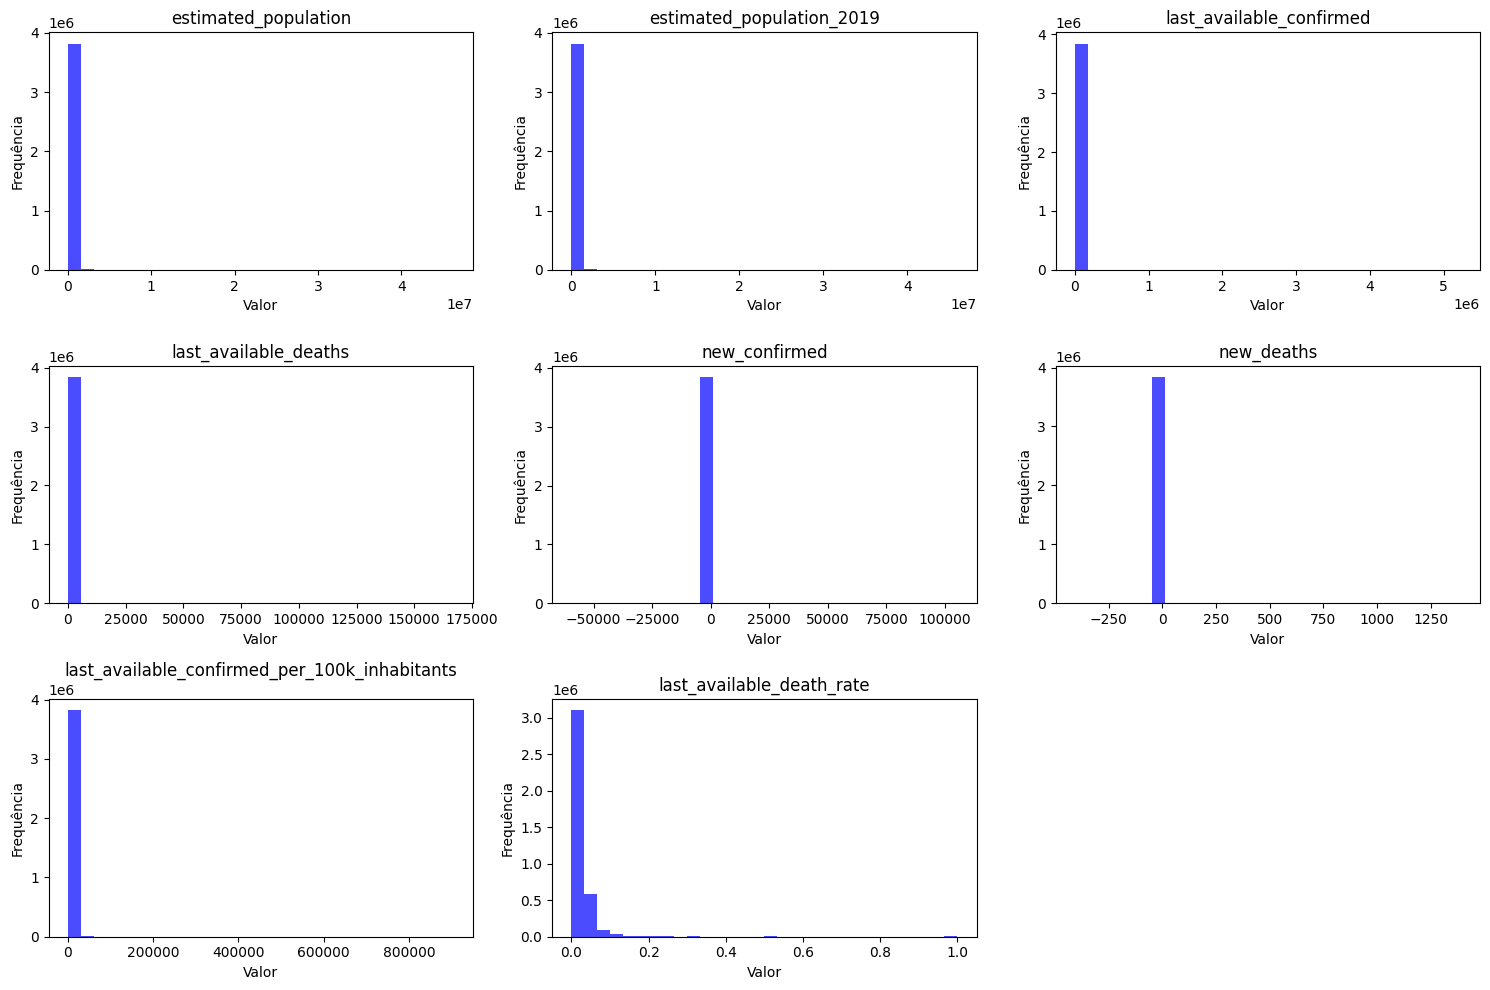

In [ ]:
# Análises gráficas

colunas_desejadas = [
    'estimated_population',
    'estimated_population_2019',
    'last_available_confirmed',
    'last_available_deaths',
    'new_confirmed',
    'new_deaths',
    'last_available_confirmed_per_100k_inhabitants',
    'last_available_death_rate'
]

plt.figure(figsize=(15, 10))

for i, coluna in enumerate(colunas_desejadas):
    plt.subplot(3, 3, i + 1)
    plt.hist(bd[coluna].dropna(), bins=30, alpha=0.7, color='blue')
    plt.title(coluna)
    plt.xlabel('Valor')
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()


### 5- Existe alguma correlação entre as variáveis numéricas?

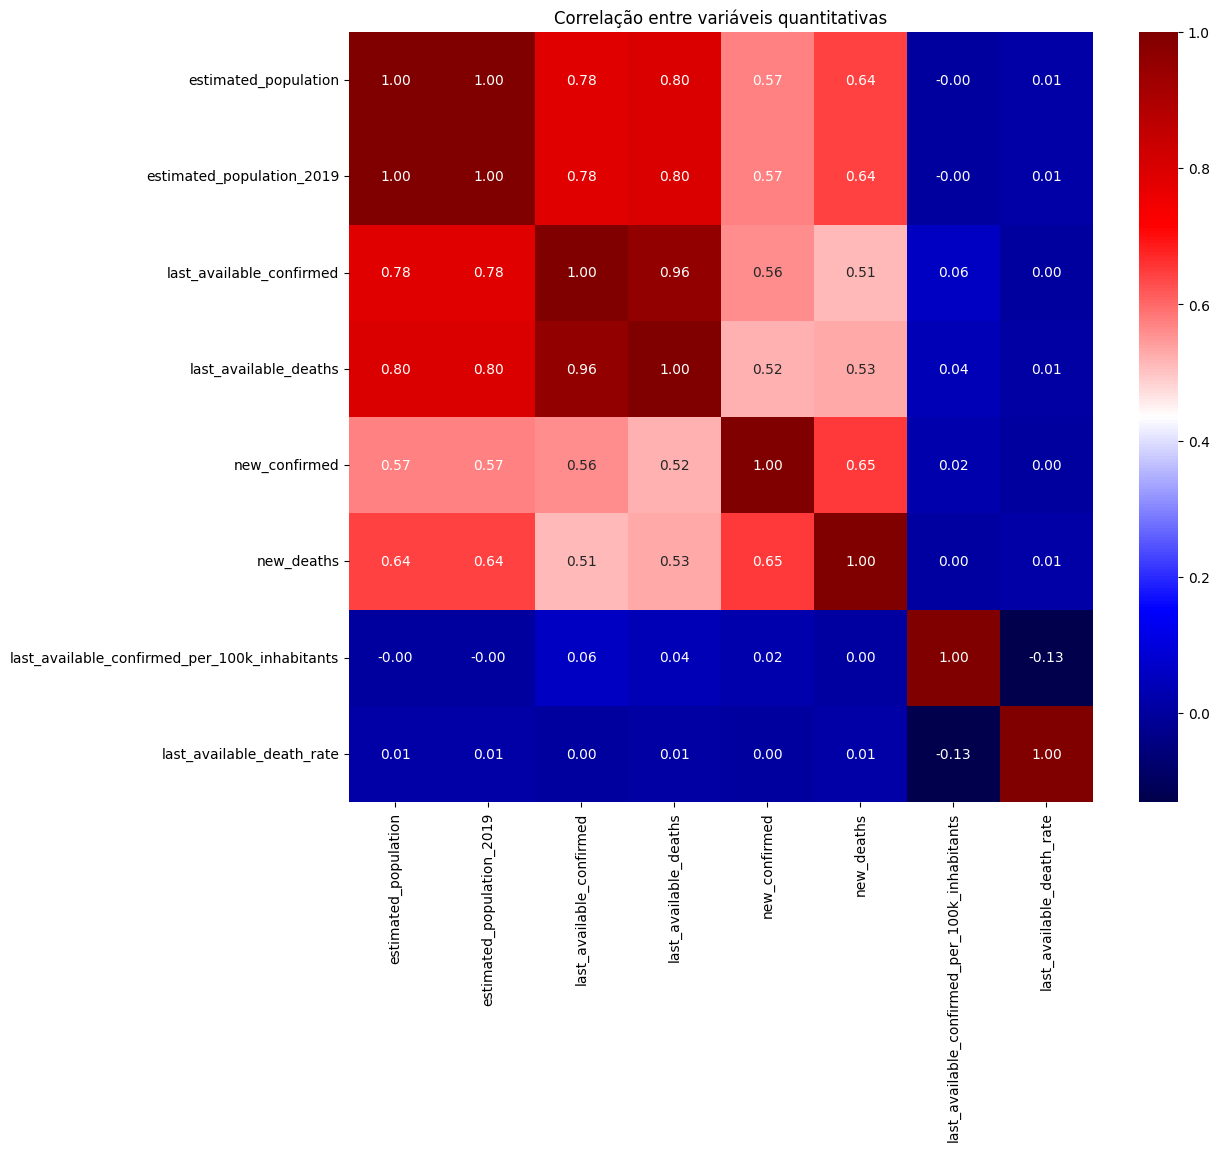

In [ ]:
# Correlação entre variavéis quantitativas Pearson

plt.figure(figsize=(12, 10))
correlation_matrix = bd[['estimated_population',
    'estimated_population_2019',
    'last_available_confirmed',
    'last_available_deaths',
    'new_confirmed',
    'new_deaths',
    'last_available_confirmed_per_100k_inhabitants',
    'last_available_death_rate']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='seismic', fmt='.2f')
plt.title('Correlação entre variáveis quantitativas')
plt.show()


Os valores no mapa de calor variam de -1 a 1, onde: 1 indica uma correlação positiva perfeita, -1 indica uma correlação negativa perfeita, 0 indica nenhuma correlação.

### 6- Como os dados categóricos estão distribuídos?


Análise da coluna: city
╒═════════════════════════════════════════╤════════════════════════╕
│ Métrica                                 │ Valor                  │
╞═════════════════════════════════════════╪════════════════════════╡
│ Total de registros                      │ 3853648                │
├─────────────────────────────────────────┼────────────────────────┤
│ Valores faltantes                       │ 20119                  │
├─────────────────────────────────────────┼────────────────────────┤
│ Percentual de faltantes                 │ 0.52%                  │
├─────────────────────────────────────────┼────────────────────────┤
│ Categorias únicas                       │ 5298                   │
├─────────────────────────────────────────┼────────────────────────┤
│ Categoria mais frequente                │ Importados/Indefinidos │
├─────────────────────────────────────────┼────────────────────────┤
│ Ocorrências da categoria mais frequente │ 13646                  │
├────────

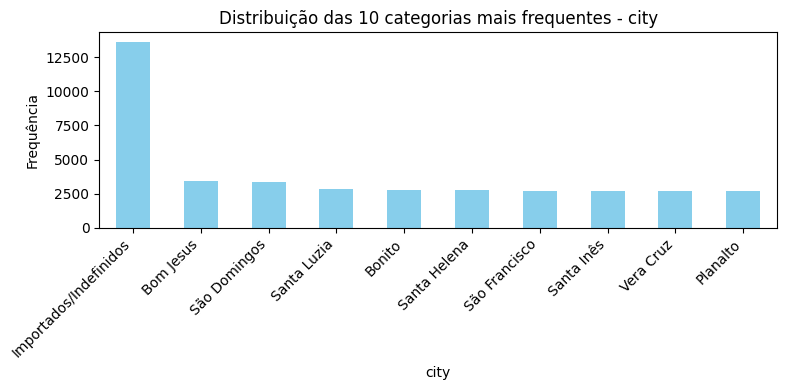


Análise da coluna: is_last
╒═════════════════════════════════════════╤═════════╕
│ Métrica                                 │ Valor   │
╞═════════════════════════════════════════╪═════════╡
│ Total de registros                      │ 3853648 │
├─────────────────────────────────────────┼─────────┤
│ Valores faltantes                       │ 0       │
├─────────────────────────────────────────┼─────────┤
│ Percentual de faltantes                 │ 0.00%   │
├─────────────────────────────────────────┼─────────┤
│ Categorias únicas                       │ 2       │
├─────────────────────────────────────────┼─────────┤
│ Categoria mais frequente                │ False   │
├─────────────────────────────────────────┼─────────┤
│ Ocorrências da categoria mais frequente │ 3848032 │
├─────────────────────────────────────────┼─────────┤
│ Percentual da categoria mais frequente  │ 99.85%  │
╘═════════════════════════════════════════╧═════════╛


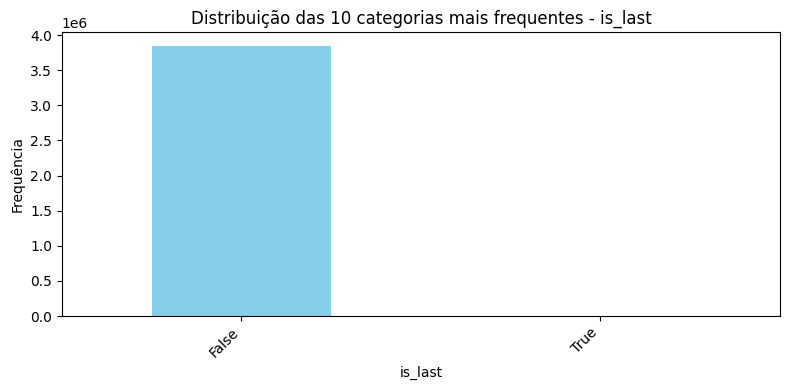


Análise da coluna: is_repeated
╒═════════════════════════════════════════╤═════════╕
│ Métrica                                 │ Valor   │
╞═════════════════════════════════════════╪═════════╡
│ Total de registros                      │ 3853648 │
├─────────────────────────────────────────┼─────────┤
│ Valores faltantes                       │ 0       │
├─────────────────────────────────────────┼─────────┤
│ Percentual de faltantes                 │ 0.00%   │
├─────────────────────────────────────────┼─────────┤
│ Categorias únicas                       │ 2       │
├─────────────────────────────────────────┼─────────┤
│ Categoria mais frequente                │ False   │
├─────────────────────────────────────────┼─────────┤
│ Ocorrências da categoria mais frequente │ 2838003 │
├─────────────────────────────────────────┼─────────┤
│ Percentual da categoria mais frequente  │ 73.64%  │
╘═════════════════════════════════════════╧═════════╛


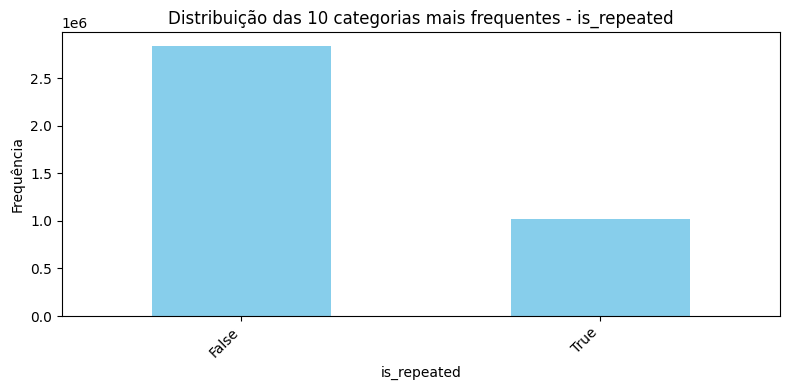


Análise da coluna: place_type
╒═════════════════════════════════════════╤═════════╕
│ Métrica                                 │ Valor   │
╞═════════════════════════════════════════╪═════════╡
│ Total de registros                      │ 3853648 │
├─────────────────────────────────────────┼─────────┤
│ Valores faltantes                       │ 0       │
├─────────────────────────────────────────┼─────────┤
│ Percentual de faltantes                 │ 0.00%   │
├─────────────────────────────────────────┼─────────┤
│ Categorias únicas                       │ 2       │
├─────────────────────────────────────────┼─────────┤
│ Categoria mais frequente                │ city    │
├─────────────────────────────────────────┼─────────┤
│ Ocorrências da categoria mais frequente │ 3833529 │
├─────────────────────────────────────────┼─────────┤
│ Percentual da categoria mais frequente  │ 99.48%  │
╘═════════════════════════════════════════╧═════════╛


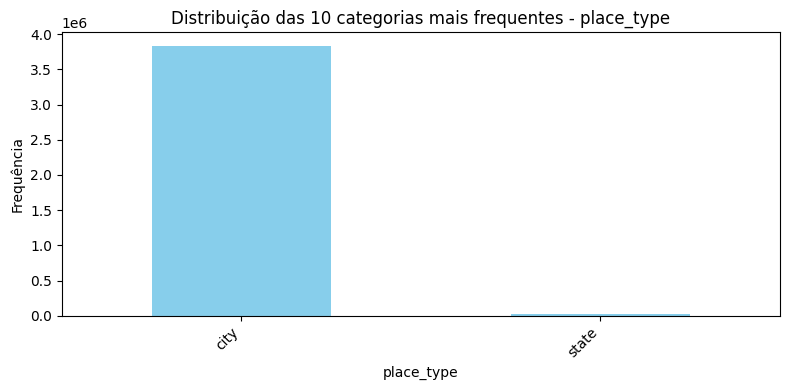


Análise da coluna: state
╒═════════════════════════════════════════╤═════════╕
│ Métrica                                 │ Valor   │
╞═════════════════════════════════════════╪═════════╡
│ Total de registros                      │ 3853648 │
├─────────────────────────────────────────┼─────────┤
│ Valores faltantes                       │ 0       │
├─────────────────────────────────────────┼─────────┤
│ Percentual de faltantes                 │ 0.00%   │
├─────────────────────────────────────────┼─────────┤
│ Categorias únicas                       │ 27      │
├─────────────────────────────────────────┼─────────┤
│ Categoria mais frequente                │ MG      │
├─────────────────────────────────────────┼─────────┤
│ Ocorrências da categoria mais frequente │ 574802  │
├─────────────────────────────────────────┼─────────┤
│ Percentual da categoria mais frequente  │ 14.92%  │
╘═════════════════════════════════════════╧═════════╛


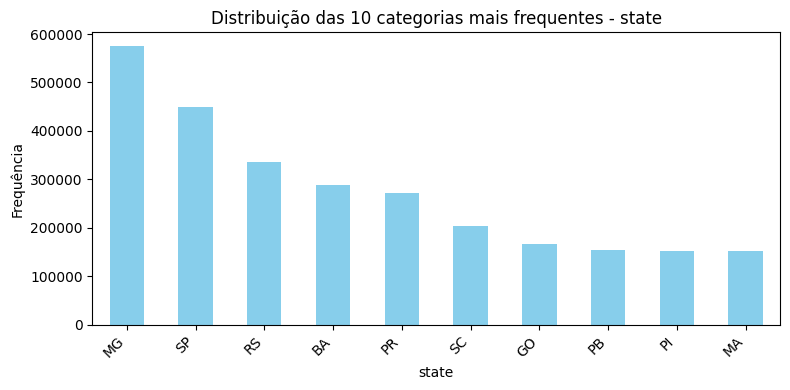

In [ ]:
# Análise variáveis  categóricas

selected_columns = ['city', 'is_last', 'is_repeated', 'place_type', 'state']
def analyze_categorical(df, column):
    value_counts = df[column].value_counts()
    total = len(df[column])
    missing = df[column].isna().sum()
    missing_percentage = (missing / total) * 100
    most_frequent = value_counts.idxmax()
    most_frequent_count = value_counts.max()
    most_frequent_percentage = (most_frequent_count / total) * 100

    table_data = [
        ['Total de registros', total],
        ['Valores faltantes', missing],
        ['Percentual de faltantes', f'{missing_percentage:.2f}%'],
        ['Categorias únicas', len(value_counts)],
        ['Categoria mais frequente', most_frequent],
        ['Ocorrências da categoria mais frequente', most_frequent_count],
        ['Percentual da categoria mais frequente', f'{most_frequent_percentage:.2f}%'],
    ]

    print(f"\nAnálise da coluna: {column}")
    print(tabulate(table_data, headers=['Métrica', 'Valor'], tablefmt='fancy_grid'))

    if len(value_counts) > 1:
        plt.figure(figsize=(8, 4))
        value_counts.head(10).plot(kind='bar', color='skyblue')
        plt.title(f'Distribuição das 10 categorias mais frequentes - {column}')
        plt.ylabel('Frequência')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

for col in selected_columns:
    analyze_categorical(bd, col)

### 7- Existe alguma relação entre as variáveis numéricas?

**Analise das relações numéricas:**

* **Forte correlação positiva:**
    * Entre as variáveis de população estimada (em diferentes anos) e o número total de casos confirmados e mortes. Isso é esperado, pois populações maiores geralmente apresentam números mais altos de casos e mortes.
    * Entre o número total de casos confirmados e o número total de mortes. Isso também é esperado, pois um maior número de casos tende a levar a um maior número de mortes.
* **Correlação positiva moderada:**
    * Entre as variáveis de novos casos e novos óbitos. Essa relação indica que, em geral, um aumento no número de novos casos está associado a um aumento no número de novos óbitos.

**Outras observações:**

* **Correlação fraca ou nula:** A maioria das outras correlações são fracas ou nulas. Isso sugere que essas variáveis não possuem uma relação linear forte entre si. Por exemplo, a correlação entre o número de casos por 100 mil habitantes e as outras variáveis é muito baixa, indicando que a densidade populacional não é um forte preditor dos números absolutos de casos e mortes.

**Resumindo:**

A matriz de correlação indica que as variáveis relacionadas à população e aos números totais de casos e mortes estão fortemente relacionadas, como esperado. No entanto, a relação entre novas infecções e novas mortes, embora positiva, é moderada. A densidade populacional, medida pelo número de casos por 100 mil habitantes, não parece ser um forte preditor dos números absolutos de casos e mortes.


# **Análise de Outliers:**
Discuta os dados anômalos (outliers) encontrados durante a análise e justifique, em cada contexto, a melhor opção: manter ou descartar os outliers. Argumente como essas decisões impactam a análise e a interpretação dos dados.

In [ ]:
# Função para contar outliers usando o método IQR
def count_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((column < lower_bound) | (column > upper_bound)).sum()

# Selecionar apenas as colunas numéricas
numeric_columns = bd.select_dtypes(include=[np.number]).columns

# Calcular o número de outliers e a porcentagem para cada coluna
total_rows = len(bd)
outlier_stats = []

for column in numeric_columns:
    outlier_count = count_outliers(bd[column])
    outlier_percentage = (outlier_count / total_rows) * 100
    outlier_stats.append({
        'Column': column,
        'Outlier Count': outlier_count,
        'Outlier Percentage': outlier_percentage
    })

# Criar um DataFrame com as estatísticas de outliers
outlier_df = pd.DataFrame(outlier_stats)

# Formatar a coluna de porcentagem
outlier_df['Outlier Percentage'] = outlier_df['Outlier Percentage'].map('{:.2f}%'.format)

# Adicionar uma linha com o total de linhas do DataFrame
total_row = pd.DataFrame({
    'Column': ['Total Rows'],
    'Outlier Count': [total_rows],
    'Outlier Percentage': ['100.00%']
})

# Concatenar a linha de total com o DataFrame de outliers
outlier_df = pd.concat([outlier_df, total_row], ignore_index=True)

# Exibir a tabela
print(outlier_df.to_string(index=False))








                                       Column  Outlier Count Outlier Percentage
                               city_ibge_code          33765              0.88%
                         estimated_population         435625             11.30%
                    estimated_population_2019         433498             11.25%
                     last_available_confirmed         464617             12.06%
last_available_confirmed_per_100k_inhabitants          51843              1.35%
                    last_available_death_rate         224535              5.83%
                        last_available_deaths         479520             12.44%
                              order_for_place              0              0.00%
                                new_confirmed         578276             15.01%
                                   new_deaths         258375              6.70%
                                   Total Rows        3853648            100.00%


*Justificativa:*

Durante a análise dos dados sobre a pandemia de COVID-19, identificamos um número considerável de outliers em várias variáveis, como a população estimada, o número de casos confirmados e o número de mortes, entre outras. Após uma avaliação cuidadosa, decidimos não remover esses outliers. Nossa decisão se baseia na importância desses valores extremos para capturar a complexidade e a variabilidade da pandemia. Esses outliers podem refletir situações reais, como surtos localizados ou variações populacionais significativas, que impactam diretamente a análise. Remover esses dados poderia distorcer os resultados, levando a conclusões simplificadas demais. Mantendo-os, garantimos que eventos extremos e contextos únicos sejam considerados, preservando assim a integridade e a riqueza das informações.

---

# **SÉRIES TEMPORAIS (Data de Entrega: 21/10/2024)**

Séries temporais geralmente contêm informações valiosas para a análise e previsão. Cada grupo deve selecionar uma série temporal específica e, com base no conteúdo das aulas, realizar uma análise detalhada sobre o comportamento da série ao longo do tempo.

## Questões e Sugestões para Motivação da Análise:

1. **Mostre graficamente o comportamento da série temporal.**
   - Plote a série temporal e destaque os valores extremos (mínimo e máximo).
   - Verifique a existência de registros atípicos (outliers) e discuta-os.

2. **Quais são os componentes da série temporal?**
   - Identifique os componentes da série (tendência, sazonalidade, ciclo e ruído).
   - Faça uma análise separada de cada componente e apresente os gráficos correspondentes.

3. **Os resíduos da série seguem uma distribuição normal?**
   - Realize testes de normalidade nos resíduos e apresente os resultados.
   - Discuta o comportamento dos resíduos e como isso afeta a modelagem e a previsão.

---

**Observação Final:**
Esses tópicos e perguntas servem como guia para a análise, mas o grupo deve focar em contar uma história com os dados, adaptando as técnicas conforme os objetivos específicos do trabalho e o tema abordado na disciplina.


# **1 - Mostre graficamente o comportamento da série temporal.**
* Plote a série temporal e destaque os valores extremos (mínimo e
máximo).
* Verifique a existência de registros atípicos (outliers) e discuta-os.

In [ ]:
bd.columns

Index(['city', 'city_ibge_code', 'date', 'epidemiological_week',
       'estimated_population', 'estimated_population_2019', 'is_last',
       'is_repeated', 'last_available_confirmed',
       'last_available_confirmed_per_100k_inhabitants', 'last_available_date',
       'last_available_death_rate', 'last_available_deaths', 'order_for_place',
       'place_type', 'state', 'new_confirmed', 'new_deaths'],
      dtype='object')

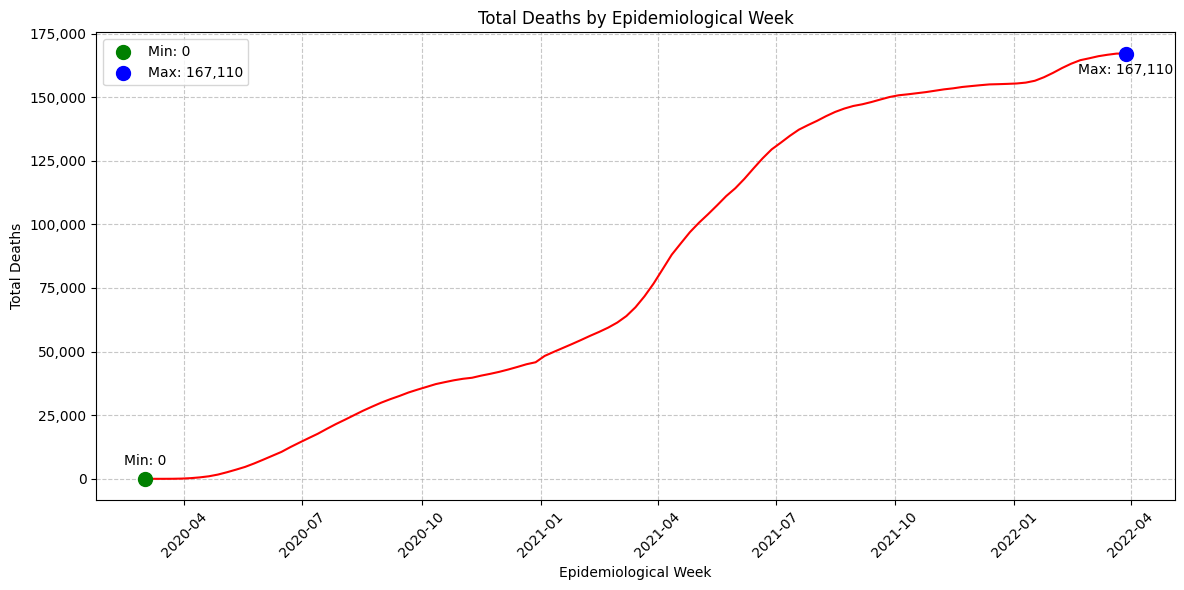

In [ ]:
# Group by epidemiological week and sum the deaths
weekly_deaths = bd.groupby('epidemiological_week')['last_available_deaths'].max()

# Create the line plot
plt.figure(figsize=(12, 6))
plt.plot(weekly_deaths.index, weekly_deaths.values, color='red')

# Customize the plot
plt.title('Total Deaths by Epidemiological Week')
plt.xlabel('Epidemiological Week')
plt.ylabel('Total Deaths')
plt.grid(True, linestyle='--', alpha=0.7)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add thousands separator to y-axis
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

# Highlight min and max values
min_week = weekly_deaths.idxmin()
max_week = weekly_deaths.idxmax()
min_deaths = weekly_deaths.min()
max_deaths = weekly_deaths.max()

plt.scatter(min_week, min_deaths, color='green', s=100, zorder=5, label=f'Min: {min_deaths:,}')
plt.scatter(max_week, max_deaths, color='blue', s=100, zorder=5, label=f'Max: {max_deaths:,}')

# Add annotations for min and max points
plt.annotate(f'Min: {min_deaths:,}', (min_week, min_deaths), textcoords="offset points", xytext=(0,10), ha='center')
plt.annotate(f'Max: {max_deaths:,}', (max_week, max_deaths), textcoords="offset points", xytext=(0,-15), ha='center')

plt.legend()

# Tight layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()


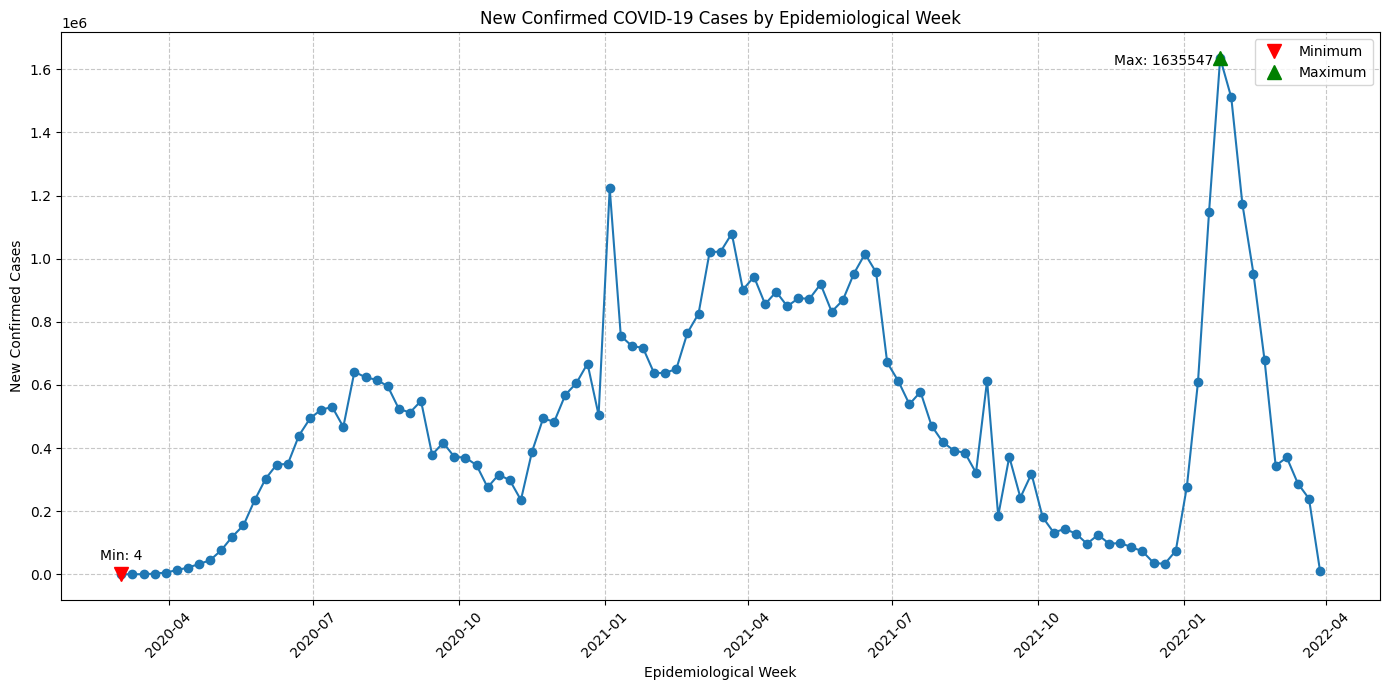

In [ ]:
# Group the data by epidemiological week and sum the new confirmed cases
weekly_cases = bd.groupby('epidemiological_week')['new_confirmed'].sum().reset_index()

# Create the line plot
plt.figure(figsize=(14, 7))
plt.plot(weekly_cases['epidemiological_week'], weekly_cases['new_confirmed'], marker='o')

# Set labels and title
plt.xlabel('Epidemiological Week')
plt.ylabel('New Confirmed Cases')
plt.title('New Confirmed COVID-19 Cases by Epidemiological Week')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add grid for better visualization
plt.grid(True, linestyle='--', alpha=0.7)

# Find and mark the minimum and maximum points
min_point = weekly_cases.loc[weekly_cases['new_confirmed'].idxmin()]
max_point = weekly_cases.loc[weekly_cases['new_confirmed'].idxmax()]

plt.plot(min_point['epidemiological_week'], min_point['new_confirmed'], 'rv', markersize=10, label='Minimum')
plt.plot(max_point['epidemiological_week'], max_point['new_confirmed'], 'g^', markersize=10, label='Maximum')

# Annotate only the minimum and maximum points
plt.annotate(f'Min: {min_point["new_confirmed"]}',
             (min_point['epidemiological_week'], min_point['new_confirmed']),
             textcoords="offset points", xytext=(0,10), ha='center')

plt.annotate(f'Max: {max_point["new_confirmed"]}',
             (max_point['epidemiological_week'], max_point['new_confirmed']),
             textcoords="offset points", xytext=(-5,-5), ha='right')

# Add legend
plt.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

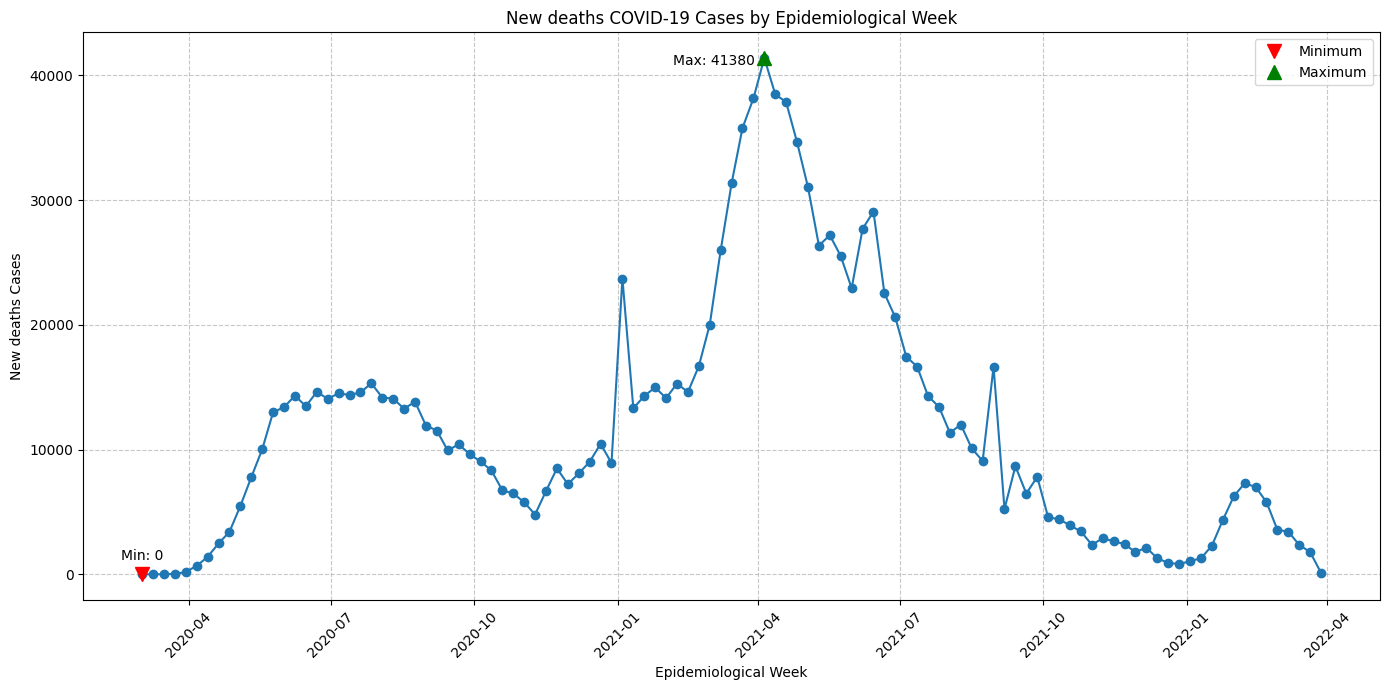

In [ ]:
# Group the data by epidemiological week and sum the new deaths cases
weekly_cases = bd.groupby('epidemiological_week')['new_deaths'].sum().reset_index()

# Create the line plot
plt.figure(figsize=(14, 7))
plt.plot(weekly_cases['epidemiological_week'], weekly_cases['new_deaths'], marker='o')

# Set labels and title
plt.xlabel('Epidemiological Week')
plt.ylabel('New deaths Cases')
plt.title('New deaths COVID-19 Cases by Epidemiological Week')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add grid for better visualization
plt.grid(True, linestyle='--', alpha=0.7)

# Find and mark the minimum and maximum points
min_point = weekly_cases.loc[weekly_cases['new_deaths'].idxmin()]
max_point = weekly_cases.loc[weekly_cases['new_deaths'].idxmax()]

plt.plot(min_point['epidemiological_week'], min_point['new_deaths'], 'rv', markersize=10, label='Minimum')
plt.plot(max_point['epidemiological_week'], max_point['new_deaths'], 'g^', markersize=10, label='Maximum')

# Annotate only the minimum and maximum points
plt.annotate(f'Min: {min_point["new_deaths"]}',
             (min_point['epidemiological_week'], min_point['new_deaths']),
             textcoords="offset points", xytext=(0,10), ha='center')

plt.annotate(f'Max: {max_point["new_deaths"]}',
             (max_point['epidemiological_week'], max_point['new_deaths']),
             textcoords="offset points", xytext=(-7,-5), ha='right')

# Add legend
plt.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

#*2-Quais são os componentes da série temporal?*


*   Identifique os componentes da série (tendência, sazonalidade, ciclo e ruído).

* Faça uma análise separada de cada componente e apresente os gráficos correspondentes.




In [ ]:
bd['epidemiological_week'].nunique()

109

Análise de Fourier: A análise de Fourier pode ajudar a identificar componentes sazonais na série temporal. Você pode usar a biblioteca statsmodels em Python.

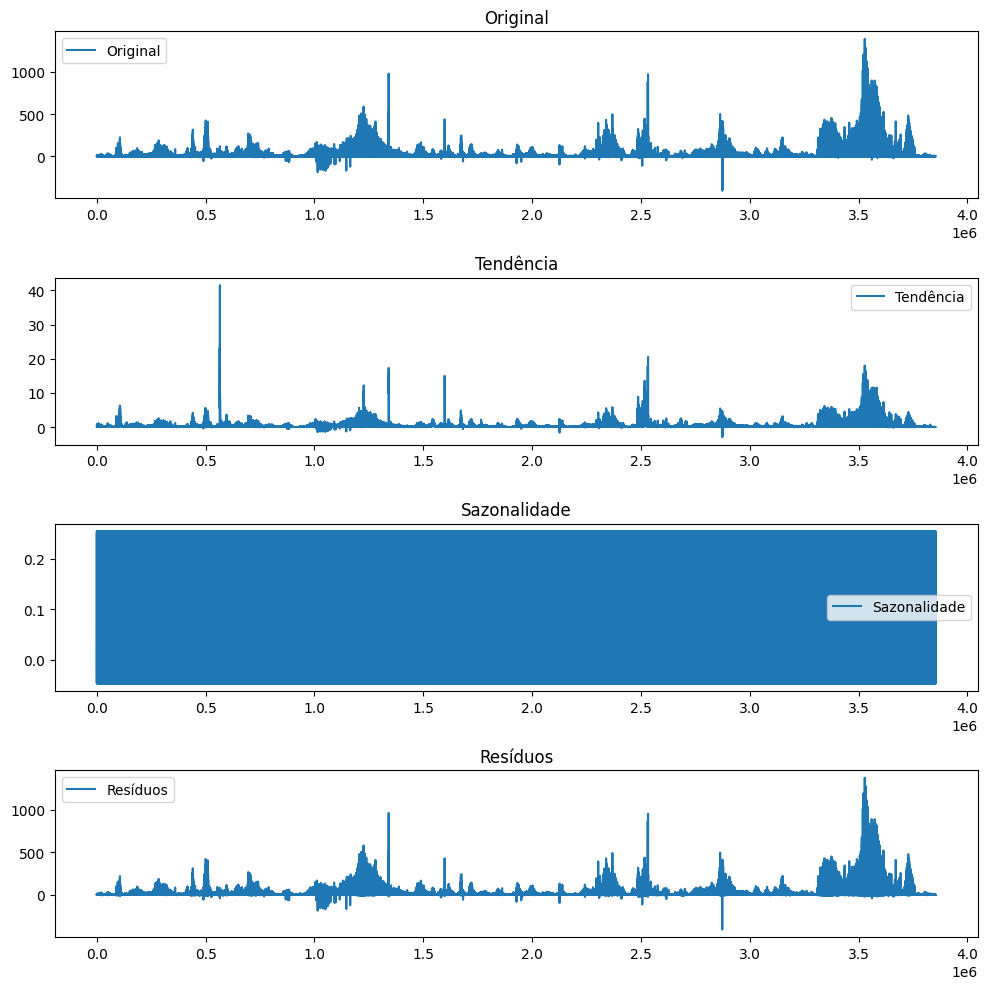

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Especifique o período da série temporal
period = 109  # Exemplo: período de 1 ano (12 meses)

# Decomponha a série temporal em componentes sazonais
decomp_new_deaths = seasonal_decompose(bd['new_deaths'], model='additive', period=period)

# Plote os componentes sazonais
trend_new_deaths = decomp_new_deaths.trend
seasonal_new_deaths = decomp_new_deaths.seasonal
residual_new_deaths = decomp_new_deaths.resid

# Crie um gráfico com 4 subplots
fig, axs = plt.subplots(4, figsize=(10, 10))

# Plot original
axs[0].plot(bd['new_deaths'], label='Original')
axs[0].set_title('Original')
axs[0].legend(loc='best')

# Plot tendência
axs[1].plot(trend_new_deaths, label='Tendência')
axs[1].set_title('Tendência')
axs[1].legend(loc='best')

# Plot sazonalidade
axs[2].plot(seasonal_new_deaths, label='Sazonalidade')
axs[2].set_title('Sazonalidade')
axs[2].legend(loc='best')

# Plot resíduos
axs[3].plot(residual_new_deaths, label='Resíduos')
axs[3].set_title('Resíduos')
axs[3].legend(loc='best')

# Ajuste o layout
fig.tight_layout()

# Mostre o gráfico
plt.show()

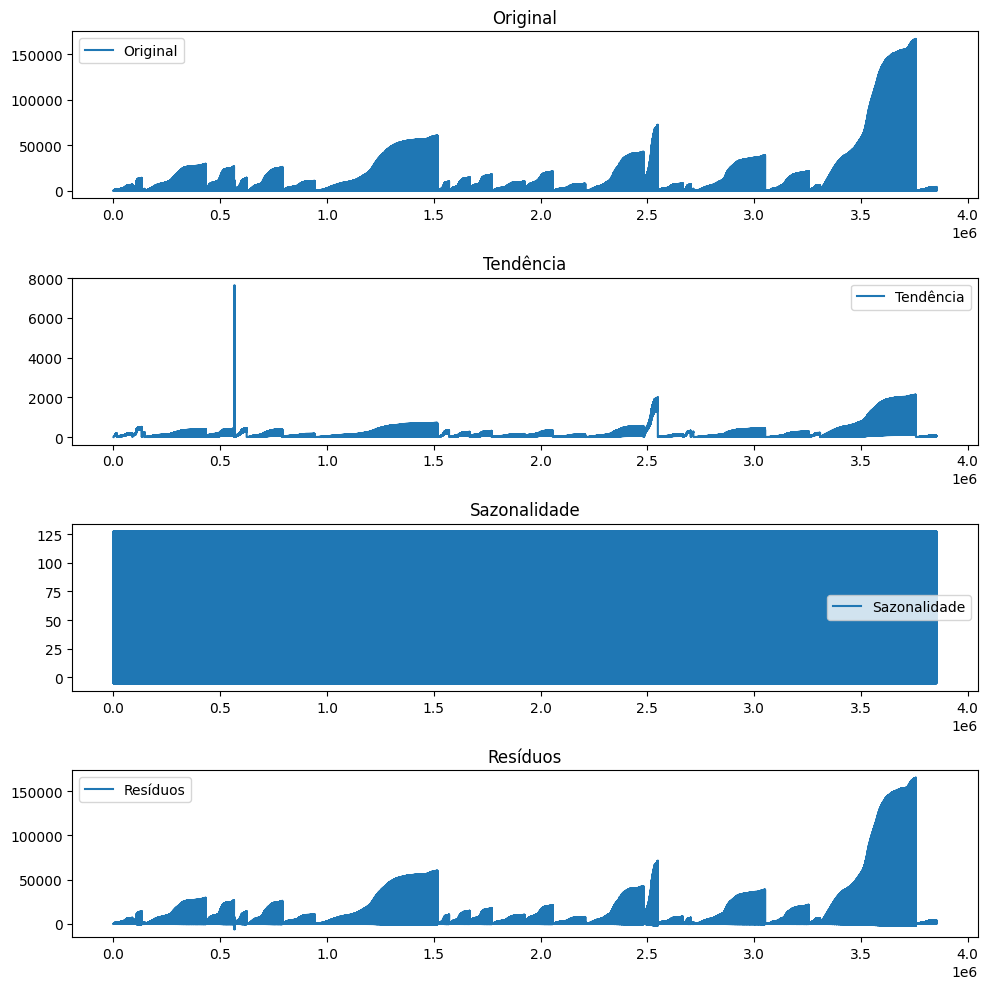

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Especifique o período da série temporal
period = 109  # Exemplo: período de 1 ano (12 meses)

# Decomponha a série temporal em componentes sazonais
decomp_last_available_deaths = seasonal_decompose(bd['last_available_deaths'], model='additive', period=period)

# Plote os componentes sazonais
trend_last_available_deaths = decomp_last_available_deaths.trend
seasonal_last_available_deaths = decomp_last_available_deaths.seasonal
residual_last_available_deaths = decomp_last_available_deaths.resid

# Crie um gráfico com 4 subplots
fig, axs = plt.subplots(4, figsize=(10, 10))

# Plot original
axs[0].plot(bd['last_available_deaths'], label='Original')
axs[0].set_title('Original')
axs[0].legend(loc='best')

# Plot tendência
axs[1].plot(trend_last_available_deaths, label='Tendência')
axs[1].set_title('Tendência')
axs[1].legend(loc='best')

# Plot sazonalidade
axs[2].plot(seasonal_last_available_deaths, label='Sazonalidade')
axs[2].set_title('Sazonalidade')
axs[2].legend(loc='best')

# Plot resíduos
axs[3].plot(residual_last_available_deaths, label='Resíduos')
axs[3].set_title('Resíduos')
axs[3].legend(loc='best')

# Ajuste o layout
fig.tight_layout()

# Mostre o gráfico
plt.show()

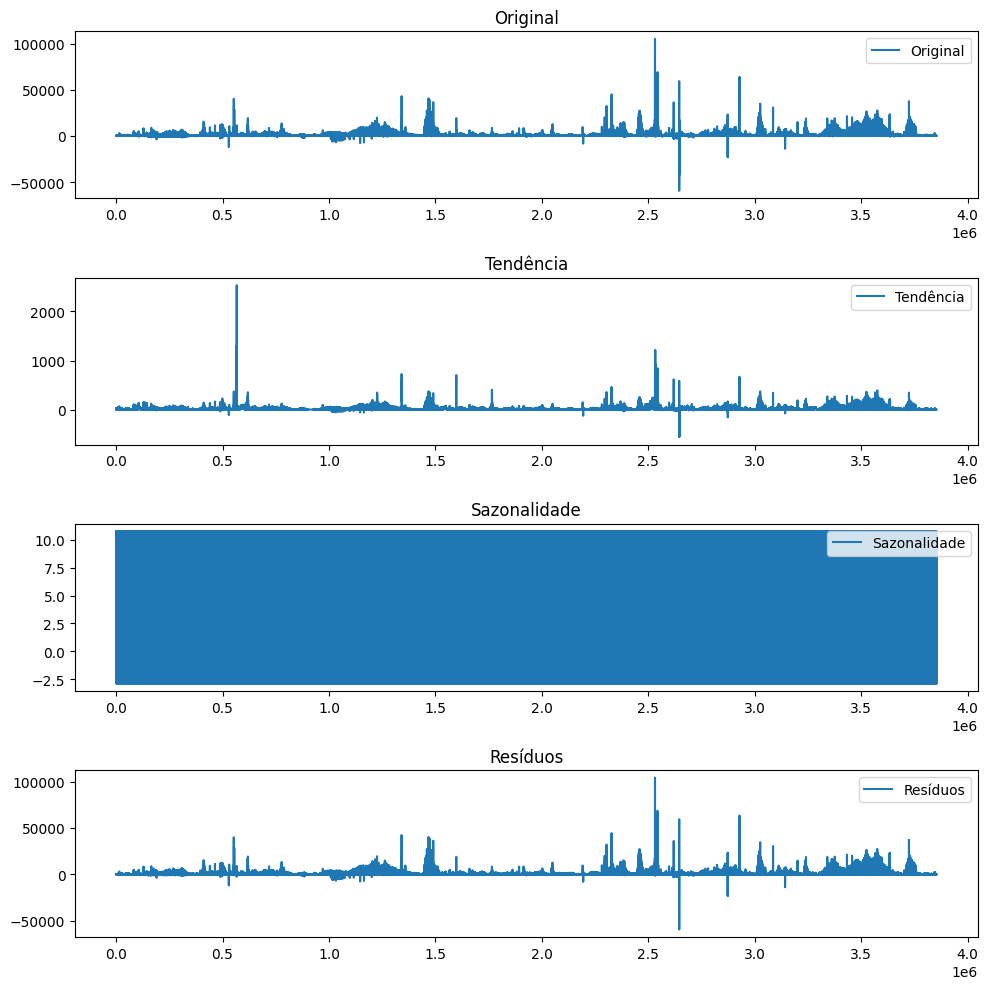

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Especifique o período da série temporal
period = 109  # Exemplo: período de 1 ano (12 meses)

# Decomponha a série temporal em componentes sazonais
decomp_new_confirmed = seasonal_decompose(bd['new_confirmed'], model='additive', period=period)

# Plote os componentes sazonais
trend_new_confirmed = decomp_new_confirmed.trend
seasonal_new_confirmed = decomp_new_confirmed.seasonal
residual_new_confirmed = decomp_new_confirmed.resid

# Crie um gráfico com 4 subplots
fig, axs = plt.subplots(4, figsize=(10, 10))

# Plot original
axs[0].plot(bd['new_confirmed'], label='Original')
axs[0].set_title('Original')
axs[0].legend(loc='best')

# Plot tendência
axs[1].plot(trend_new_confirmed, label='Tendência')
axs[1].set_title('Tendência')
axs[1].legend(loc='best')

# Plot sazonalidade
axs[2].plot(seasonal_new_confirmed, label='Sazonalidade')
axs[2].set_title('Sazonalidade')
axs[2].legend(loc='best')

# Plot resíduos
axs[3].plot(residual_new_confirmed, label='Resíduos')
axs[3].set_title('Resíduos')
axs[3].legend(loc='best')

# Ajuste o layout
fig.tight_layout()

# Mostre o gráfico
plt.show()

Média Movel

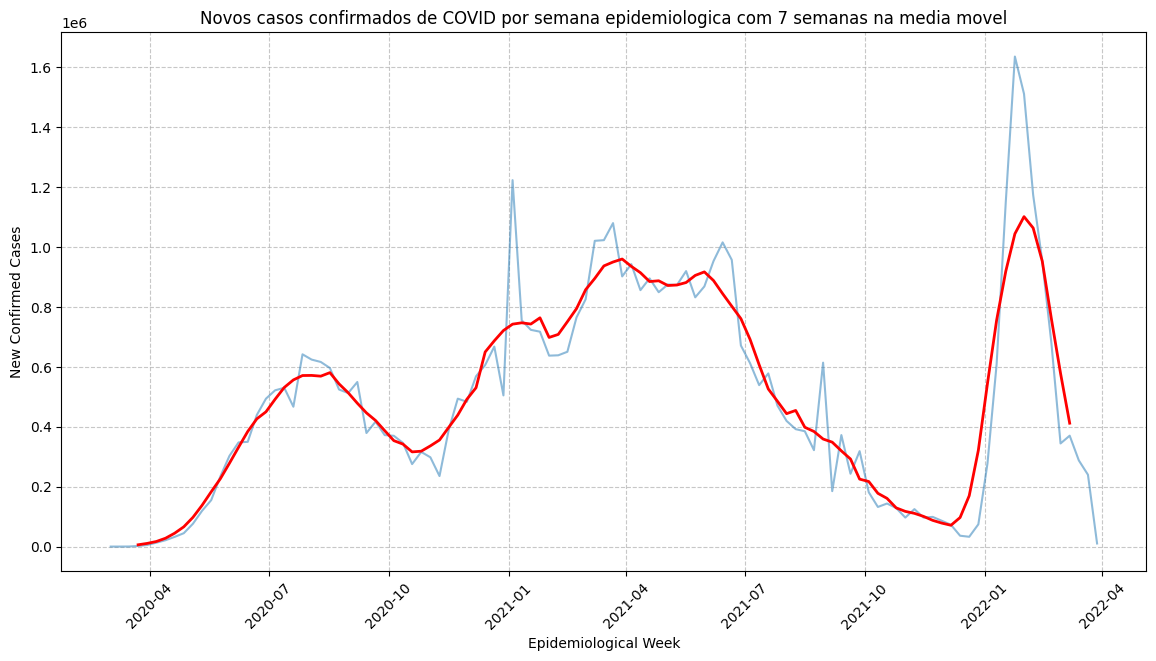

In [ ]:
# Group the data by epidemiological week and sum the new confirmed cases
weekly_cases = bd.groupby('epidemiological_week')['new_confirmed'].sum().reset_index()

# Calculate the 7-week moving average
weekly_cases['moving_average'] = weekly_cases['new_confirmed'].rolling(window=7, center=True).mean()

# Create the line plot
plt.figure(figsize=(14, 7))
plt.plot(weekly_cases['epidemiological_week'], weekly_cases['new_confirmed'], alpha=0.5, label='Weekly Cases')
plt.plot(weekly_cases['epidemiological_week'], weekly_cases['moving_average'], color='red', linewidth=2, label='7-week Moving Average')

# Set labels and title
plt.xlabel('Epidemiological Week')
plt.ylabel('New Confirmed Cases')
plt.title('Novos casos confirmados de COVID por semana epidemiologica com 7 semanas na media movel')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add grid for better visualization
plt.grid(True, linestyle='--', alpha=0.7)

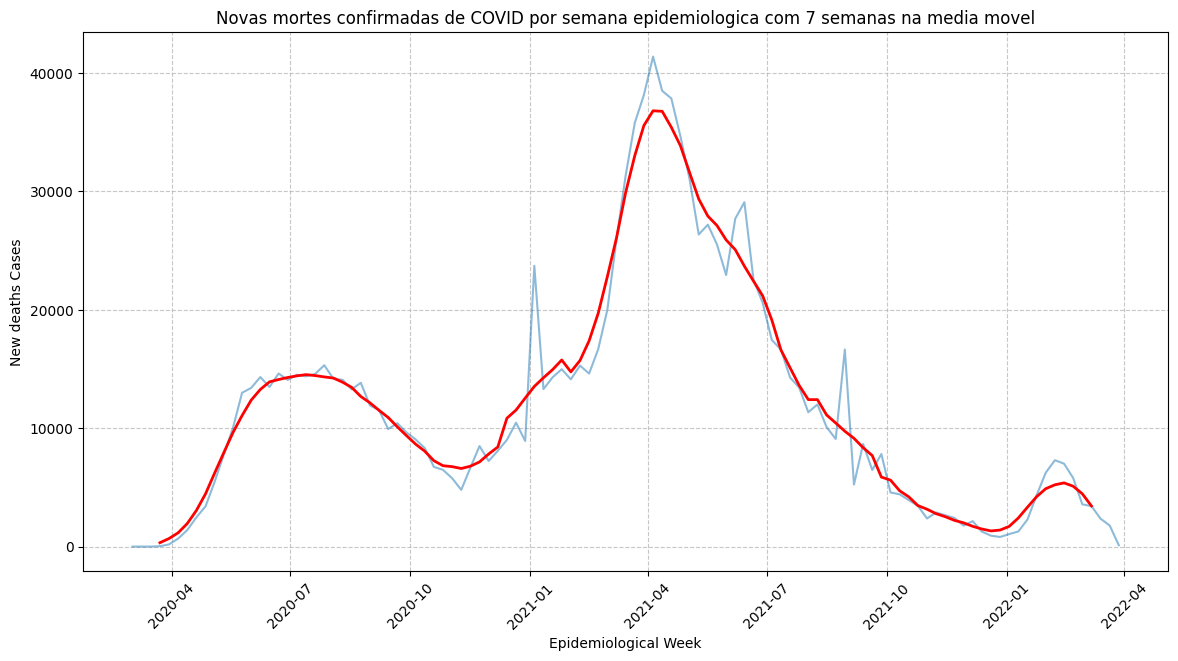

In [ ]:
# Group the data by epidemiological week and sum the new deaths cases
weekly_cases = bd.groupby('epidemiological_week')['new_deaths'].sum().reset_index()

# Calculate the 7-week moving average
weekly_cases['moving_average'] = weekly_cases['new_deaths'].rolling(window=7, center=True).mean()

# Create the line plot
plt.figure(figsize=(14, 7))
plt.plot(weekly_cases['epidemiological_week'], weekly_cases['new_deaths'], alpha=0.5, label='Weekly Cases')
plt.plot(weekly_cases['epidemiological_week'], weekly_cases['moving_average'], color='red', linewidth=2, label='7-week Moving Average')

# Set labels and title
plt.xlabel('Epidemiological Week')
plt.ylabel('New deaths Cases')
plt.title('Novas mortes confirmadas de COVID por semana epidemiologica com 7 semanas na media movel')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add grid for better visualization
plt.grid(True, linestyle='--', alpha=0.7)

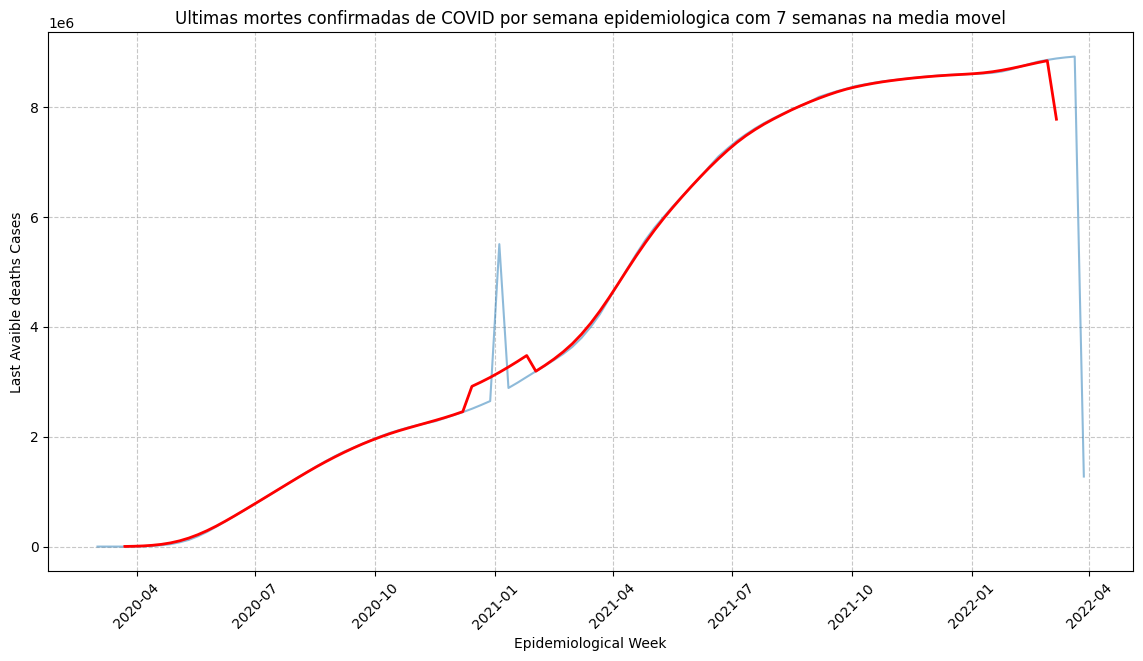

In [ ]:
# Group the data by epidemiological week and sum the new deaths cases
weekly_cases = bd.groupby('epidemiological_week')['last_available_deaths'].sum().reset_index()

# Calculate the 7-week moving average
weekly_cases['moving_average'] = weekly_cases['last_available_deaths'].rolling(window=7, center=True).mean()

# Create the line plot
plt.figure(figsize=(14, 7))
plt.plot(weekly_cases['epidemiological_week'], weekly_cases['last_available_deaths'], alpha=0.5, label='Weekly Cases')
plt.plot(weekly_cases['epidemiological_week'], weekly_cases['moving_average'], color='red', linewidth=2, label='7-week Moving Average')

# Set labels and title
plt.xlabel('Epidemiological Week')
plt.ylabel('Last Avaible deaths Cases')
plt.title('Ultimas mortes confirmadas de COVID por semana epidemiologica com 7 semanas na media movel')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add grid for better visualization
plt.grid(True, linestyle='--', alpha=0.7)

#*3-Os resíduos da série seguem uma distribuição normal?*


* Realize testes de normalidade nos resíduos e apresente os resultados.
* Discuta o comportamento dos resíduos e como isso afeta a modelagem e a previsão.




Teste de normalidade

In [ ]:
print(residual_new_deaths.isna().sum())

108


In [ ]:
drop_residual_new_deaths = residual_new_deaths.dropna()
drop_residual_new_confirmed = residual_new_confirmed.dropna()
drop_residual_last_available_deaths = residual_last_available_deaths.dropna()

In [ ]:
residual_new_deaths.describe()

count   3.853.540
mean            0
std             6
min          -407
25%            -0
50%            -0
75%            -0
max         1.375
Name: resid, dtype: float64

c:\Users\victo\OneDrive\Área de Trabalho\notebook raphel\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 3853540.
  res = hypotest_fun_out(*samples, **kwds)


Teste de Shapiro-Wilk: p-valor = 9.777919269716926e-249
Teste de Kolmogorov-Smirnov: p-valor = 0.0


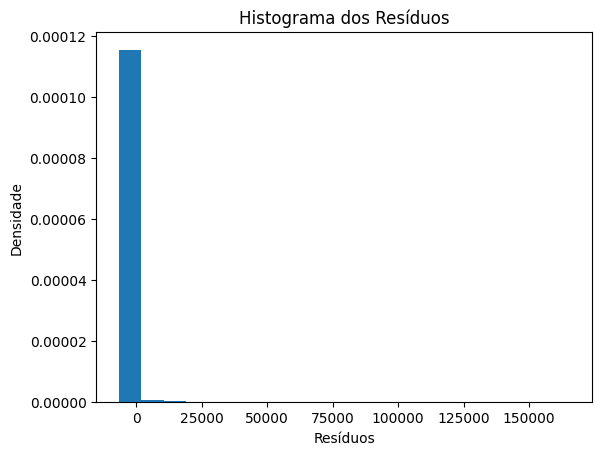

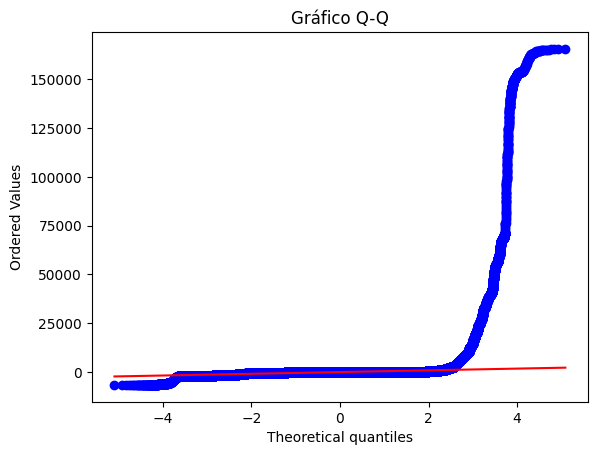

In [ ]:
from scipy import stats

# Teste de Shapiro-Wilk
stat, p = stats.shapiro(drop_residual_last_available_deaths)
print(f"Teste de Shapiro-Wilk: p-valor = {p}")

# Teste de Kolmogorov-Smirnov
stat, p = stats.kstest(drop_residual_last_available_deaths, 'norm')
print(f"Teste de Kolmogorov-Smirnov: p-valor = {p}")

# Plotar histograma dos resíduos
plt.hist(drop_residual_last_available_deaths, bins=20, density=True)
plt.xlabel("Resíduos")
plt.ylabel("Densidade")
plt.title("Histograma dos Resíduos")
plt.show()

# Plotar gráfico Q-Q (Quantile-Quantile)
stats.probplot(drop_residual_last_available_deaths, dist="norm", plot=plt)
plt.title("Gráfico Q-Q")
plt.show()

c:\Users\victo\OneDrive\Área de Trabalho\notebook raphel\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 3853540.
  res = hypotest_fun_out(*samples, **kwds)


Teste de Shapiro-Wilk: p-valor = 2.530723185709116e-249
Teste de Kolmogorov-Smirnov: p-valor = 0.0


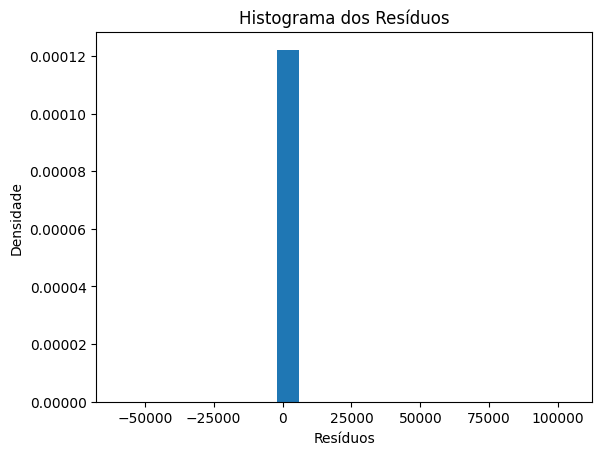

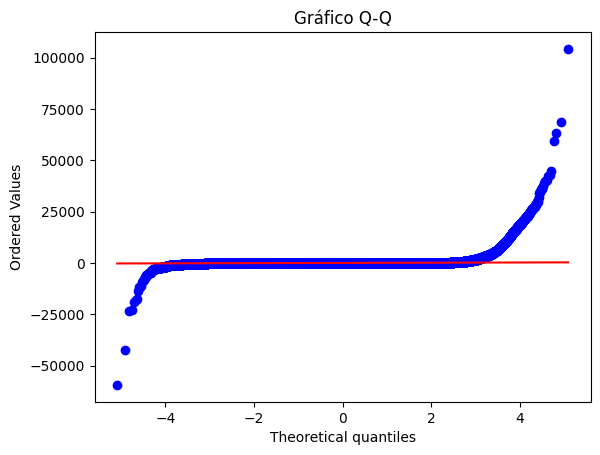

In [ ]:
# Teste de Shapiro-Wilk
stat, p = stats.shapiro(drop_residual_new_confirmed)
print(f"Teste de Shapiro-Wilk: p-valor = {p}")

# Teste de Kolmogorov-Smirnov
stat, p = stats.kstest(drop_residual_new_confirmed, 'norm')
print(f"Teste de Kolmogorov-Smirnov: p-valor = {p}")

# Plotar histograma dos resíduos
plt.hist(drop_residual_new_confirmed, bins=20, density=True)
plt.xlabel("Resíduos")
plt.ylabel("Densidade")
plt.title("Histograma dos Resíduos")
plt.show()

# Plotar gráfico Q-Q (Quantile-Quantile)
stats.probplot(drop_residual_new_confirmed, dist="norm", plot=plt)
plt.title("Gráfico Q-Q")
plt.show()

c:\Users\victo\OneDrive\Área de Trabalho\notebook raphel\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 3853540.
  res = hypotest_fun_out(*samples, **kwds)


Teste de Shapiro-Wilk: p-valor = 4.0344547662117773e-249
Teste de Kolmogorov-Smirnov: p-valor = 0.0


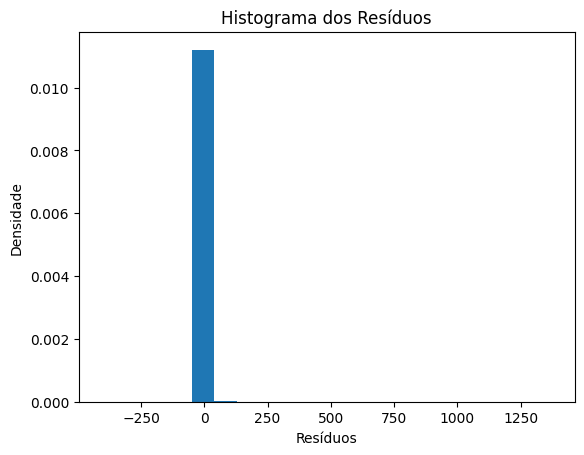

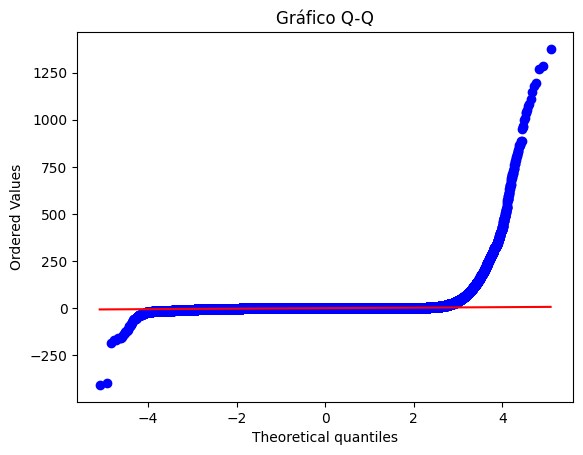

In [ ]:
# Teste de Shapiro-Wilk
stat, p = stats.shapiro(drop_residual_new_deaths)
print(f"Teste de Shapiro-Wilk: p-valor = {p}")

# Teste de Kolmogorov-Smirnov
stat, p = stats.kstest(drop_residual_new_deaths, 'norm')
print(f"Teste de Kolmogorov-Smirnov: p-valor = {p}")

# Plotar histograma dos resíduos
plt.hist(drop_residual_new_deaths, bins=20, density=True)
plt.xlabel("Resíduos")
plt.ylabel("Densidade")
plt.title("Histograma dos Resíduos")
plt.show()

# Plotar gráfico Q-Q (Quantile-Quantile)
stats.probplot(drop_residual_new_deaths, dist="norm", plot=plt)
plt.title("Gráfico Q-Q")
plt.show()

In [ ]:
from scipy.stats import normaltest

normaltest(bd["last_available_deaths"])



NormaltestResult(statistic=np.float64(12078110.243426736), pvalue=np.float64(0.0))

In [ ]:
normaltest(bd["new_confirmed"])

NormaltestResult(statistic=np.float64(14026808.260928001), pvalue=np.float64(0.0))

In [ ]:
normaltest(bd["new_deaths"])

NormaltestResult(statistic=np.float64(13902223.794247847), pvalue=np.float64(0.0))